# Checking stability of the model versus time

<b>Problem</b><br>
One of the problems of the current framework is the fact that hard coded tests are not able to handle cases when the number of acquired statistics are limited i.e. at the low lumisection range, especially at the begining of the run. This produces too many false positives at the beginig of the run, however they stabilize over time. 

<b>Goal</b><br>
The goal of this exercise is to evaluate if the new models handle low-statistics better.

<b>Assumption</b><br>
The assumption is that the alarms are to be generated starting from none to a certain value that holds throught the run. We don't know if the predictions are correct but the aim of this exercise is to guarantee stability, not accuracy (use the other notebook for this). We also plot emerging problems as we want to ensure that the scoring fluctations are not major.

<b>Method</b><br>
We are going to plot a run certified for analysis and check the number of alarms generated throughtout the time (lumisections). We have a datapoint every 10 lumisections.

### Let's check the stability:

In [4]:
# Had to be generated before loading in the notebook because ROOT/Notebook import issues
import pandas as pd
df = pd.read_csv('../data/stability.csv')

For <i>lumi = 0</i> the model returns negative result. Let's add this information since we don't have it in dataframe now.

In [5]:
df_zero = pd.DataFrame({'lumi': [0], 'total': [0], 'emerging': [0]})
df = pd.concat([df_zero, df], ignore_index=True)

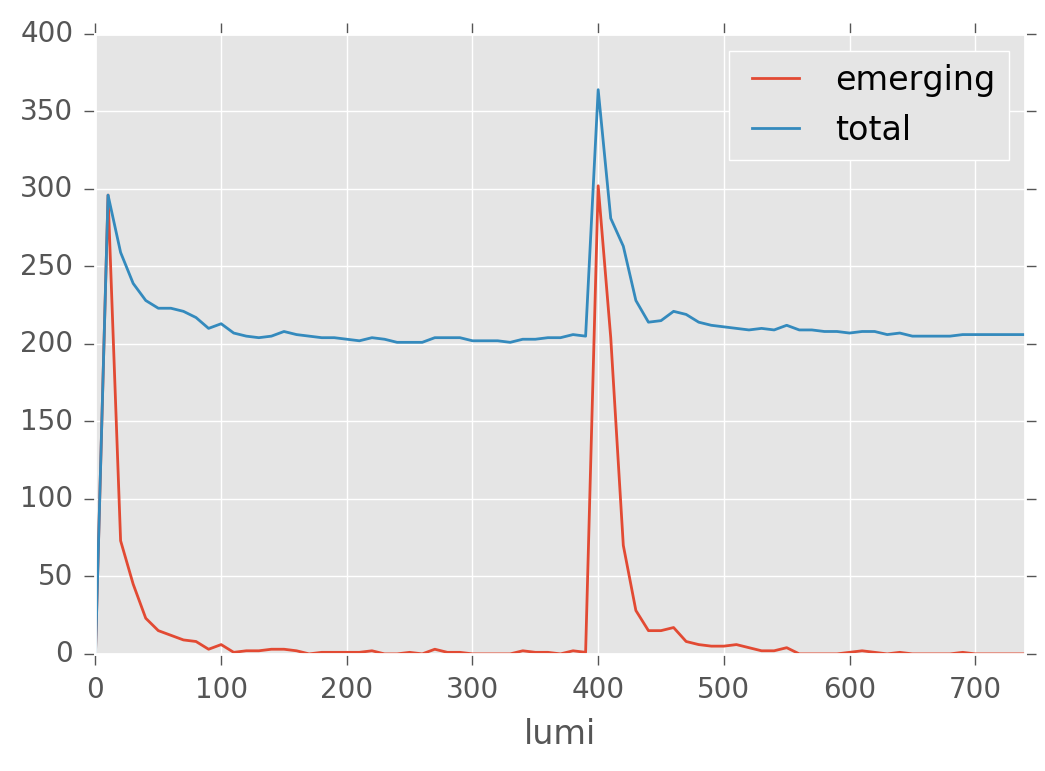

In [6]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax = df.plot(ax=ax, kind='line', x='lumi')
plt.show()

<b>Comment</b><br>
The graph shows that CNN produces stable results with not many emerging alarms. The periodic plot reset in CMSSW results in the peak at <i>lumi = 400</i>.

<b>Recommedations</b><br>
To reduce the peak at <i>lumi = 10</i> and to ensure faster stabilization one would have to label more samples integrated over low statistics.